<a href="https://colab.research.google.com/github/marina-iakimovich/ReDI-Spring2020/blob/master/ReDI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Happiness Report
###Happiness scored according to economic production, social support, etc.
Data from: https://www.kaggle.com/unsdsn/world-happiness
![alt text][logo]

[logo]: https://jaxenter.de/wp-content/uploads/2019/10/Programmieren-mit-Smiley.jpg "Happy!"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


##Load Data


In [2]:
df1 = pd.read_csv('2015.csv')
df1.head()



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df1.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


##Check if 'Happiness Score' a sum of the other 7 columns - **Yes**

In [3]:
df1['e'] = df1.sum(axis=1)-df1['Happiness Rank'] - df1['Happiness Score'] - df1['Standard Error']
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,e
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.56092
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.52708
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.52222
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.42694


get rid of the temporary extra column and the coliumn 'Standard Error'

In [4]:
df1 = df1.drop(columns=['e', 'Standard Error'])
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


##How many countries? 
158 from 195 countries in the world


In [33]:
print(len(df1), 'from 195 counries in the world')

158 from 195 counries in the world


###Set Happiness Rank as index

In [34]:
df1 = df1.set_index('Happiness Rank')

df1.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


##Happiest country in the world 2015:
###Switzerland

In [35]:
df1.loc[1]

Country                             Switzerland
Region                           Western Europe
Happiness Score                           7.587
Economy (GDP per Capita)                1.39651
Family                                  1.34951
Health (Life Expectancy)                0.94143
Freedom                                 0.66557
Trust (Government Corruption)           0.41978
Generosity                              0.29678
Dystopia Residual                       2.51738
Name: 1, dtype: object

##Country with the highest life expectancy:
###Singapore

In [36]:
df1[df1['Health (Life Expectancy)']==max(df1['Health (Life Expectancy)'])]


,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
24,Singapore,Southeastern Asia,6.798,1.52186,1.02,1.02525,0.54252,0.4921,0.31105,1.88501


##Country with the least government corruption:
###Rwanda

In [37]:
df1[df1['Trust (Government Corruption)']==max(df1['Trust (Government Corruption)'])]


,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042


#Happiness Score plot

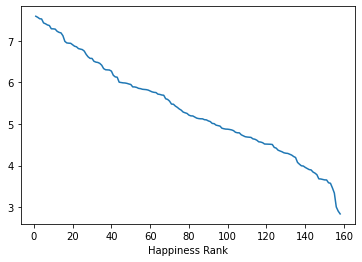

In [38]:
df1['Happiness Score'].plot()

##Which of the factors has the greatest impact on total Happiness Score? 

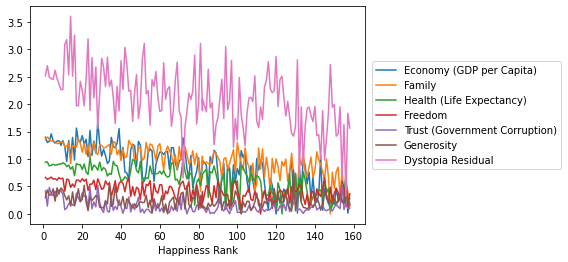

In [65]:
columns_list = list(df1.columns)
del columns_list[:3]

df1[columns_list].plot()
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.show()

Exclude Dystopia Residual factor

###**Family** and **Economy** have more impact on total Happiness then **Corruption**

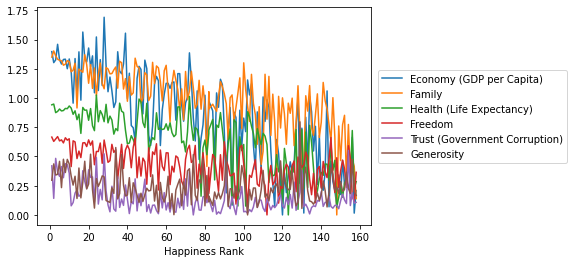

In [66]:
columns_list.remove('Dystopia Residual')
df1[columns_list].plot()
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.show()

##Is there any correlation between different factors? 

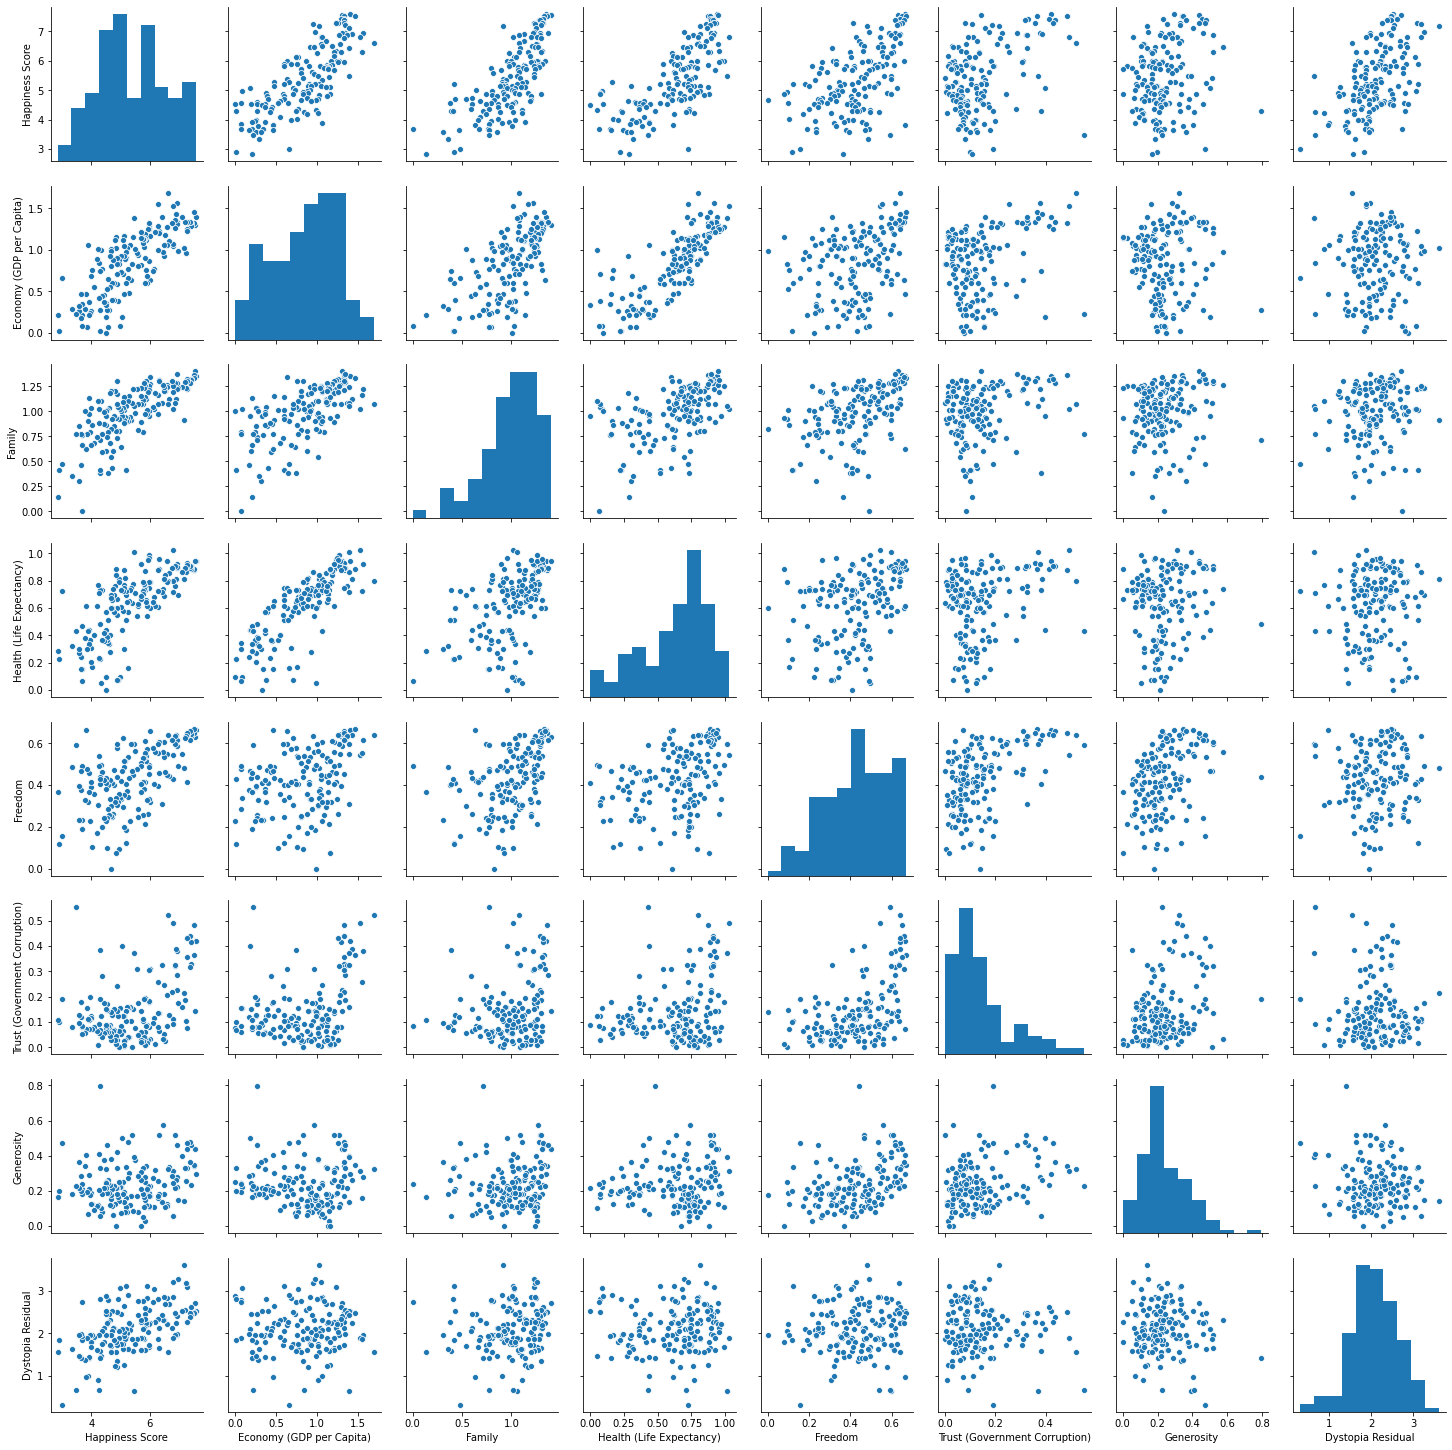

In [68]:
import seaborn as sns
sns.pairplot(df1)

##Strong correlation between **Economy** and **Health** (Life Expectancy)

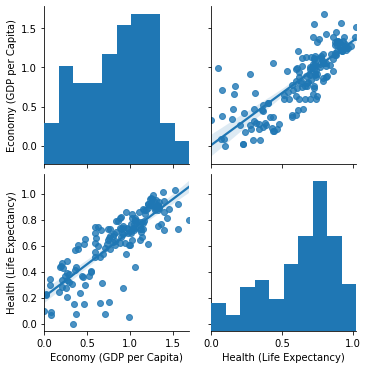

In [90]:
sns.pairplot(df1[['Economy (GDP per Capita)', 'Health (Life Expectancy)']], kind='reg')

##Correlation between **Economy** and **Family**

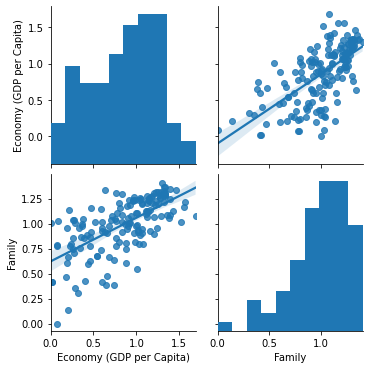

In [87]:
sns.pairplot(df1[['Economy (GDP per Capita)', 'Family']], kind='reg')

##Not much correlation between **Economy** and **Generosity**

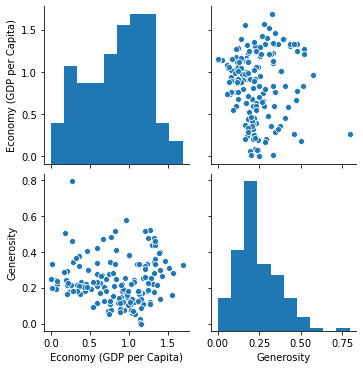

In [72]:
sns.pairplot(df1[['Economy (GDP per Capita)', 'Generosity']])

##Average happiness per region


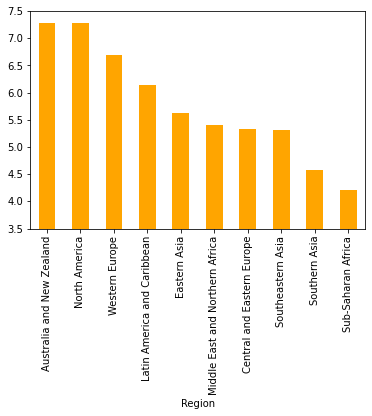

In [82]:
df1_regions['Happiness Score'].plot.bar(color='Orange')
axes = plt.gca()
axes.set_ylim([3.5, 7.5])
plt.show()